# Heart-stroke prediction

**(age) :** age in years <br>
**(sex) :** sex (1 = male; 0 = female)  <br>
**(cp)  :** cp: **chest pain type** | Value 0: **typical angina** | Value 1: **atypical angina** | Value 2: **non-anginal pain** | Value 3: **asymptomatic**  <br>
**(trestbps) :** **resting blood pressure** (in mm Hg on admission to the hospital)  <br>
**(chol):** serum **cholestoral** in mg/dl  <br>
**16 (fbs) :** (fasting **blood sugar** > 120 mg/dl) (1 = true; 0 = false)  <br>
**19 (restecg) :** resting **electrocardiographic** results | Value 0: normal | Value 1: having **ST-T wave abnormality** (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite **left ventricular hypertrophy** by Estes' criteria  <br>
**(thalach) :** **maximum heart rate** achieved  <br>
**(exang) :** exercise induced **angina** (1 = yes; 0 = no)  <br>
**(oldpeak) :** **ST depression** induced by exercise relative to rest <br>
**(slope) :** the slope of the peak exercise **ST segment** | Value 1: upsloping | Value 2: flat | Value 3: downsloping (maxium egzersizde ST segmentinin e?imi) <br>
**(ca) :** number of **major vessels** (0-3) colored by flourosopy  <br>
**(thal) :** 3 = normal; 6 = fixed defect; 7 = reversable defect  <br>
**(num) (the predicted attribute) :** Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

### Import libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

### Load dataset!

In [50]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dataset's structure and statistics!

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Variables: Categorical or Numeric?

In [6]:
cat_var = [var for var in df.columns if df[var].dtype=='O']
cat_var

[]

In [7]:
num_var = [var for var in df.columns if df[var].dtype!='O']
num_var

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

All variables seems **numeric!** But, in fact, sex, fbs, exang and target variables are (binary) categorical variables! And target is **target (dependent)** variable!

cp, slope, ca and thal has more than two labels!

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**No missing values! Also we can see that from df.info()**

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


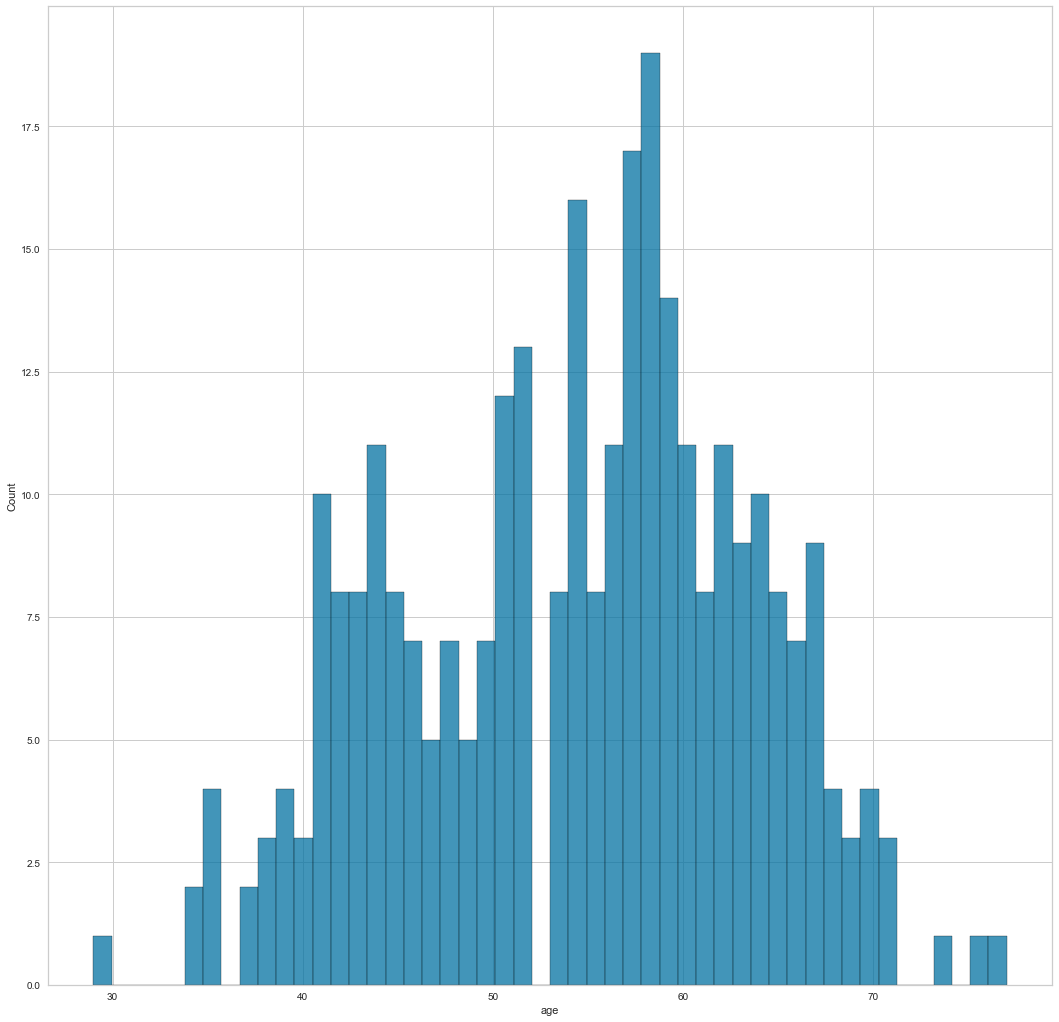

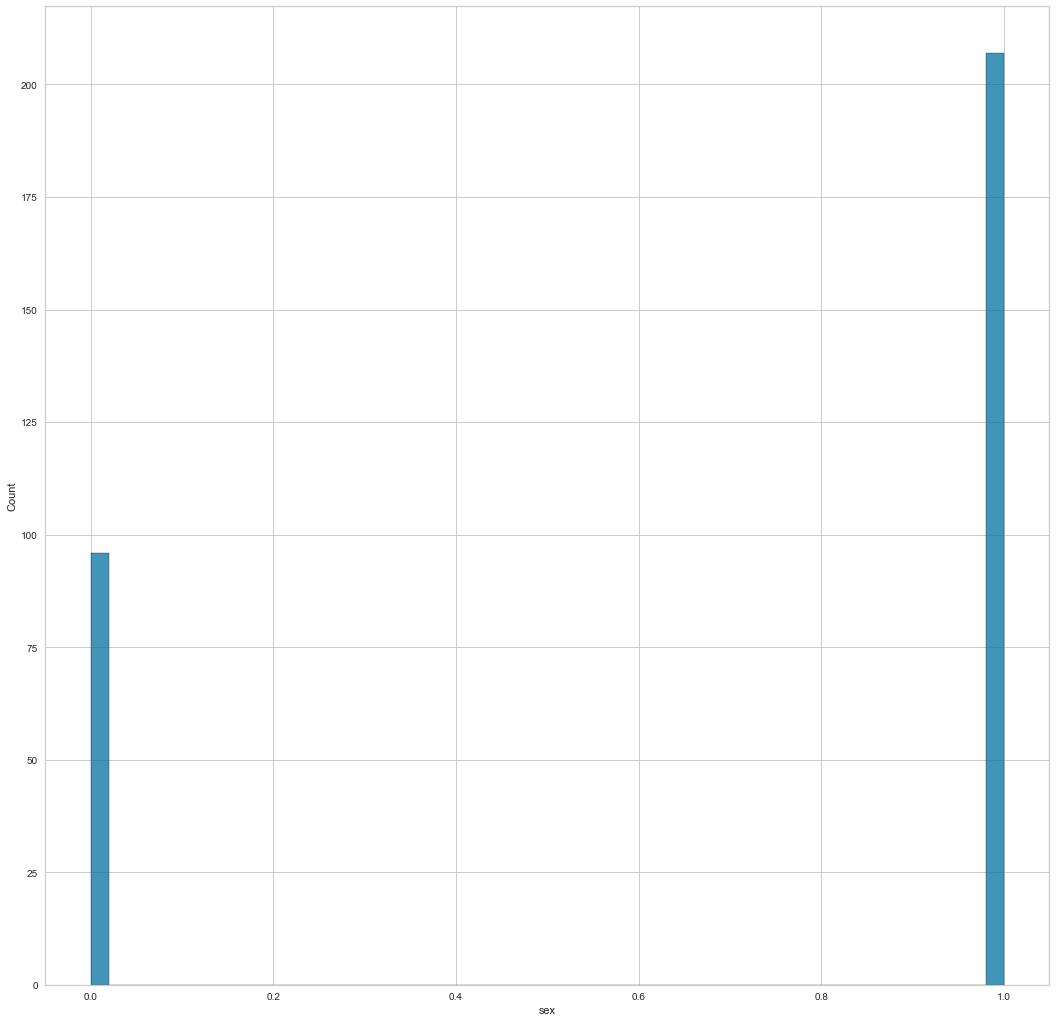

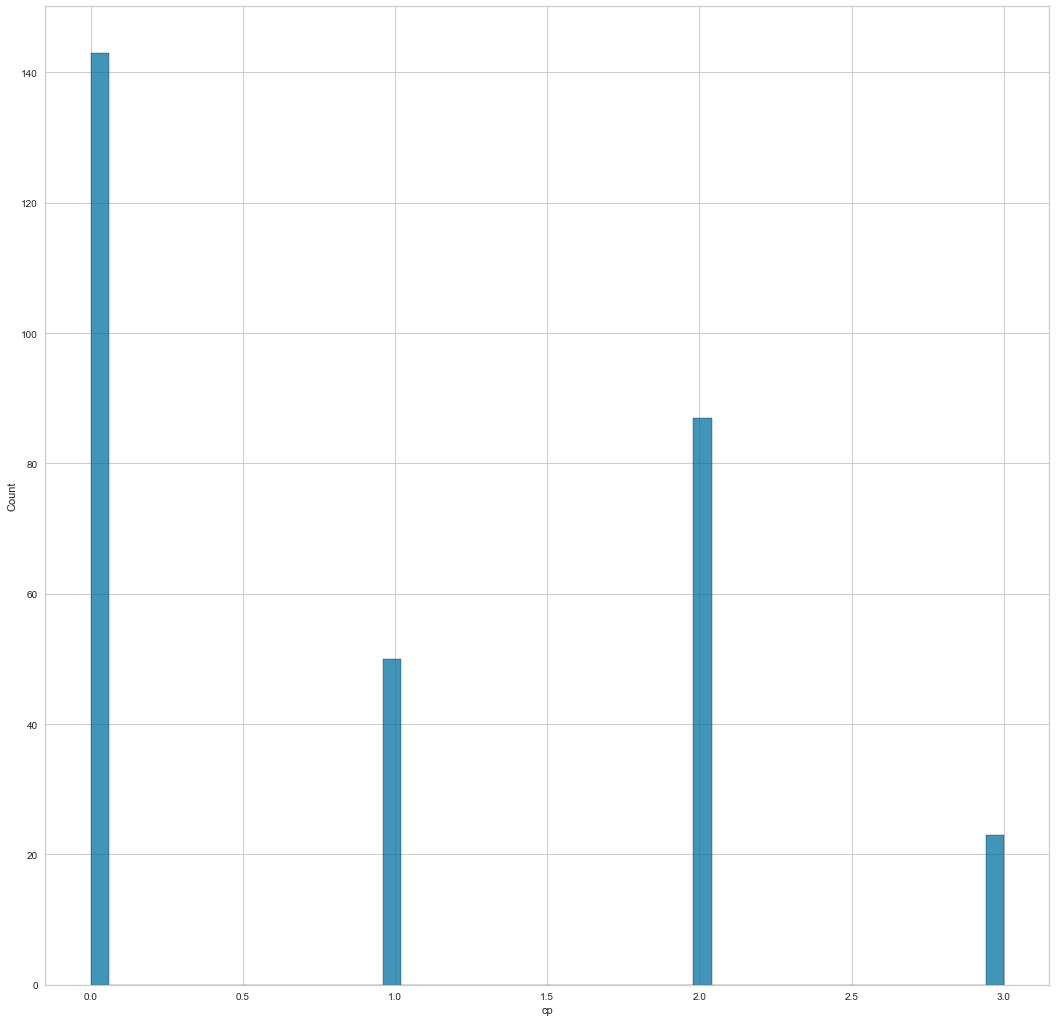

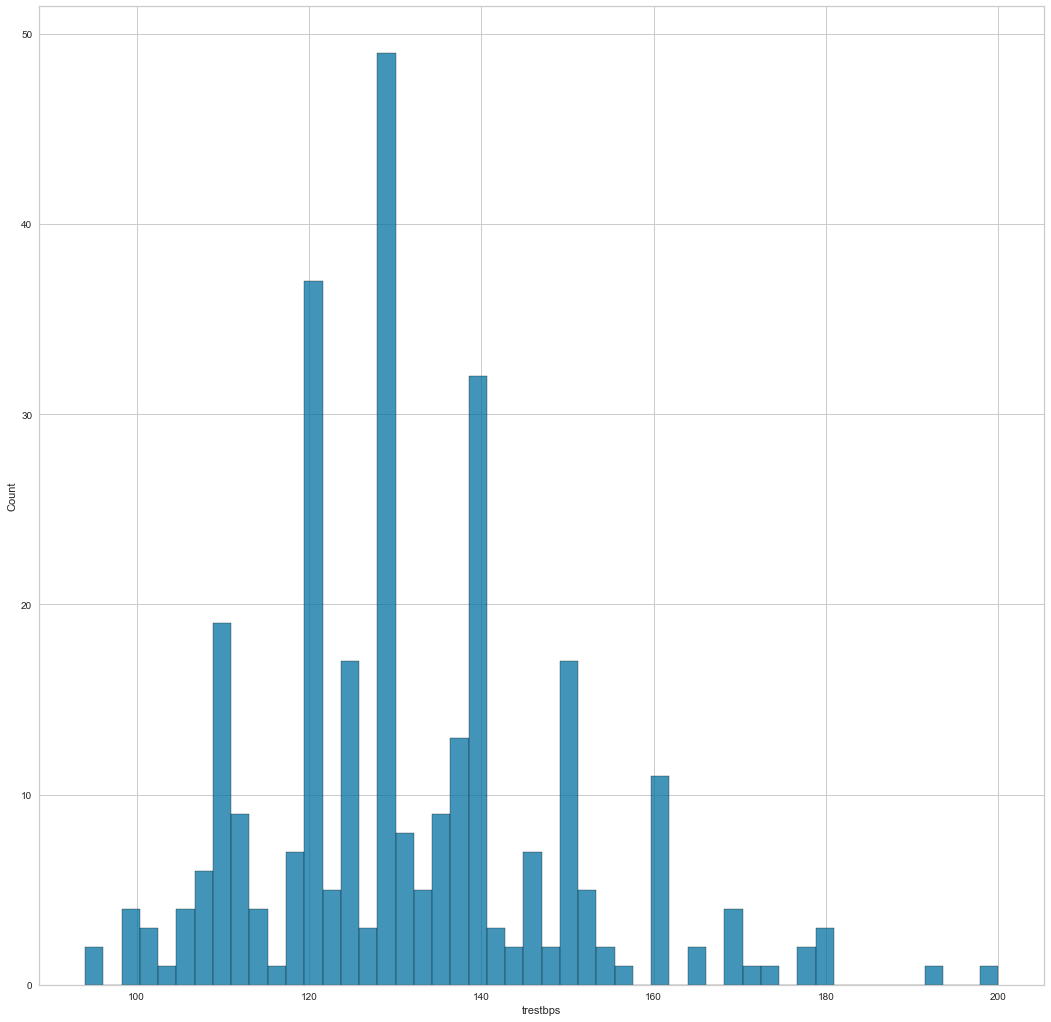

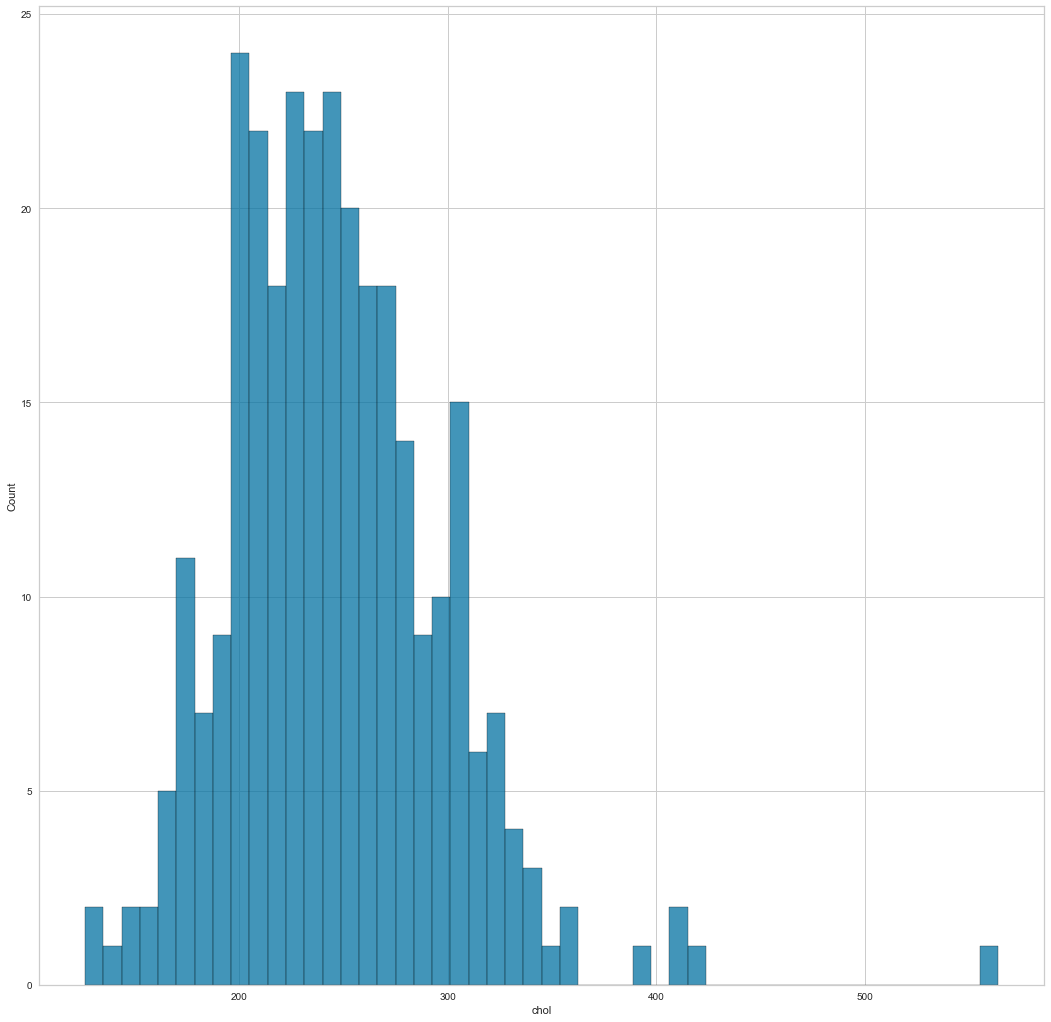

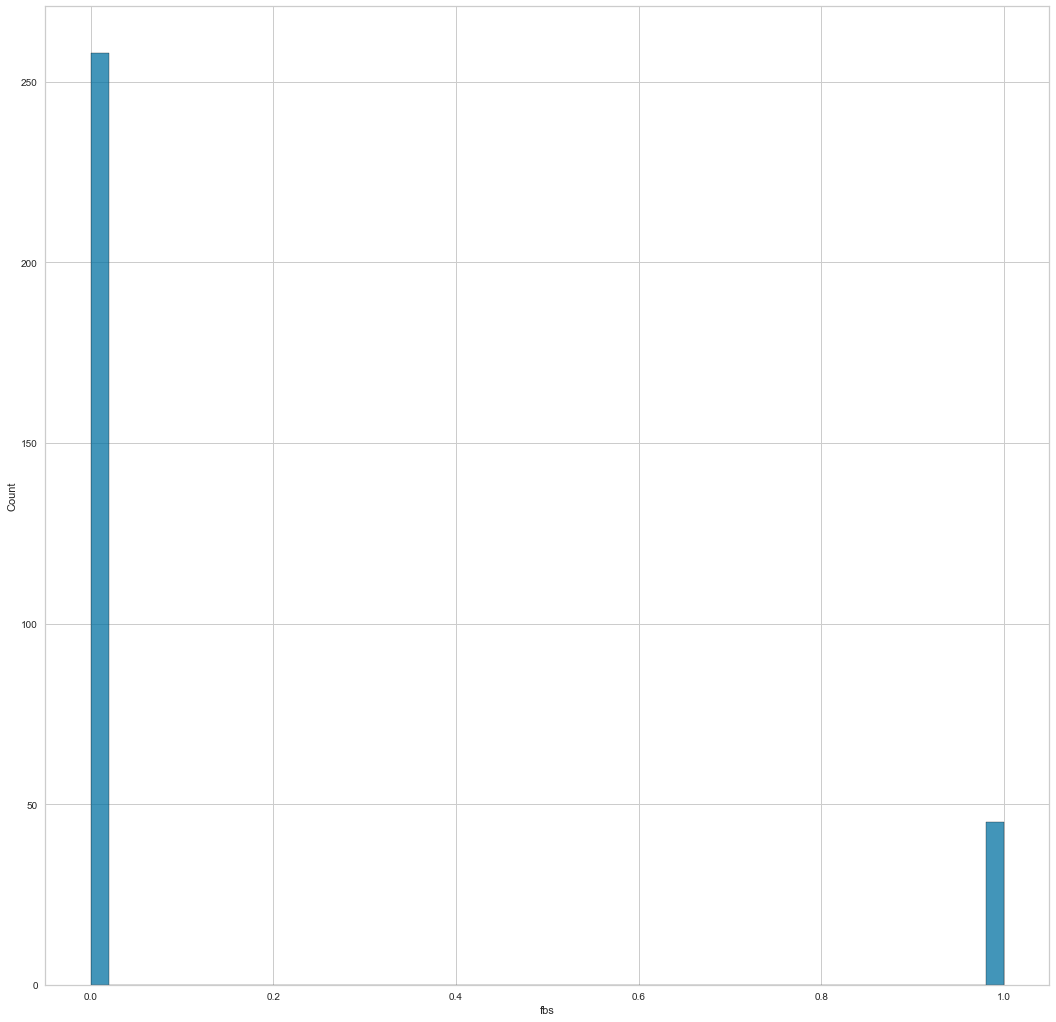

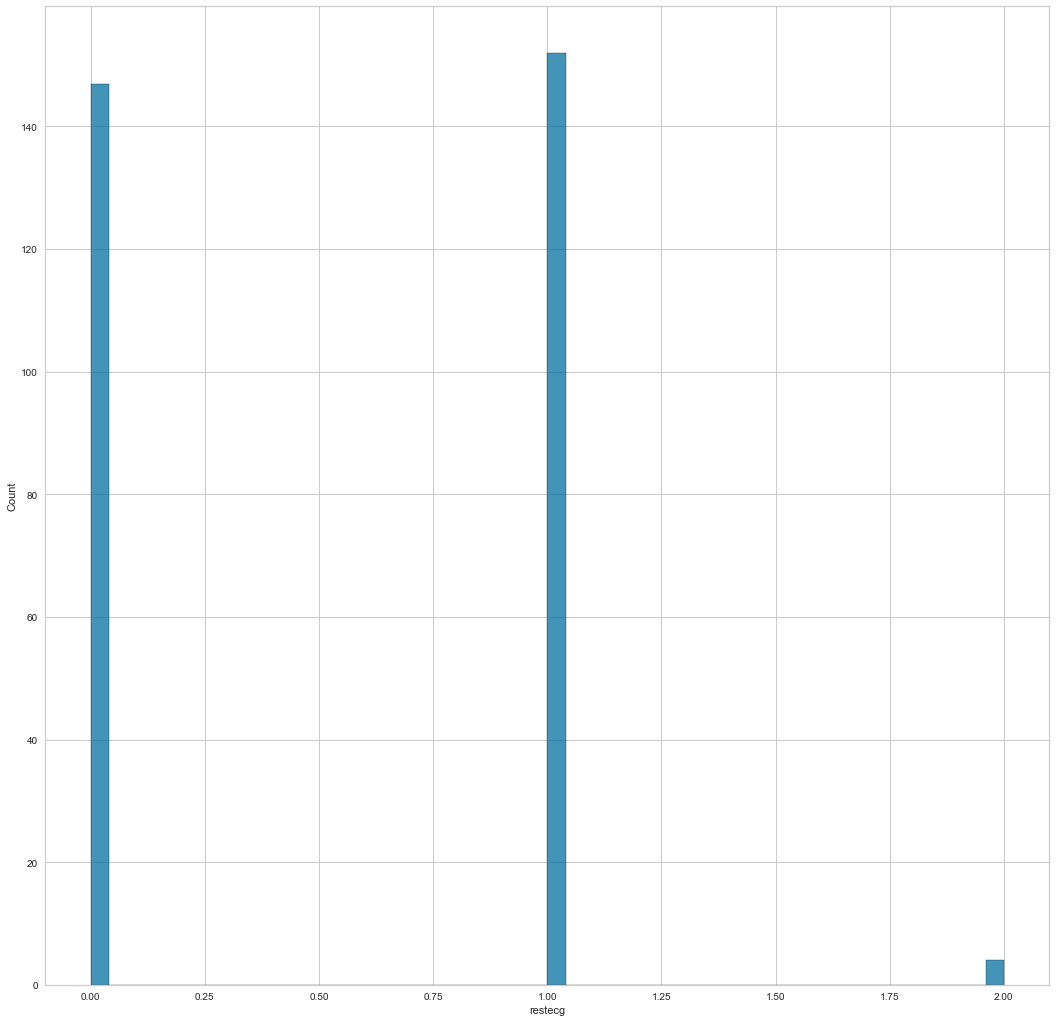

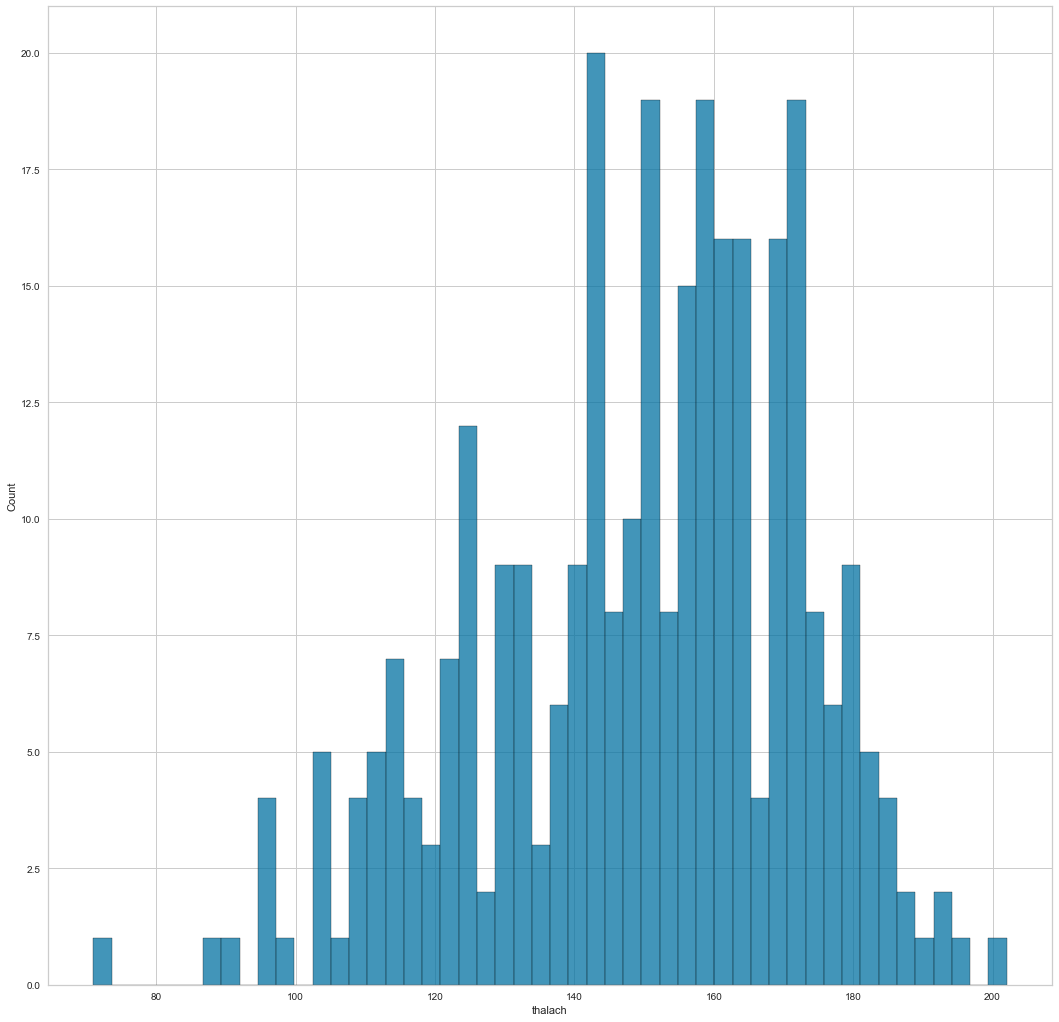

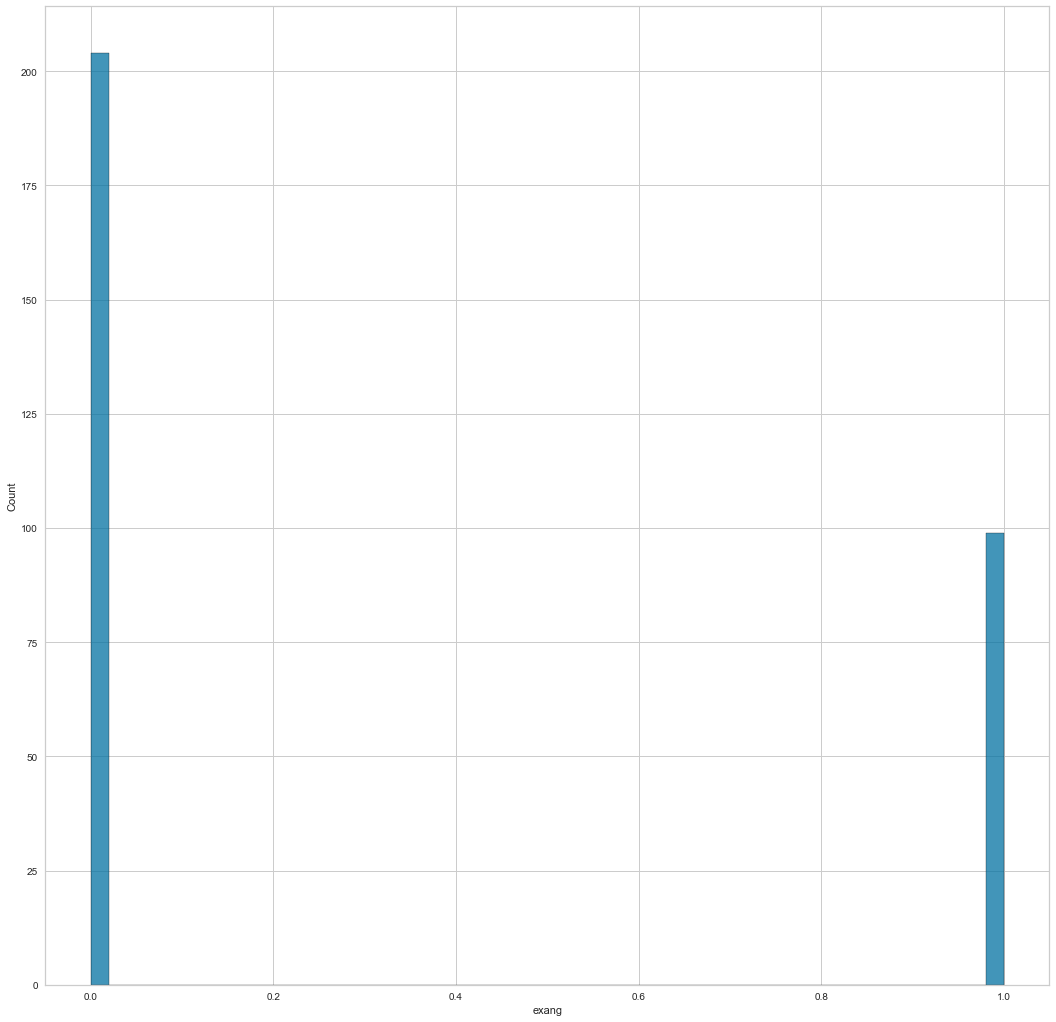

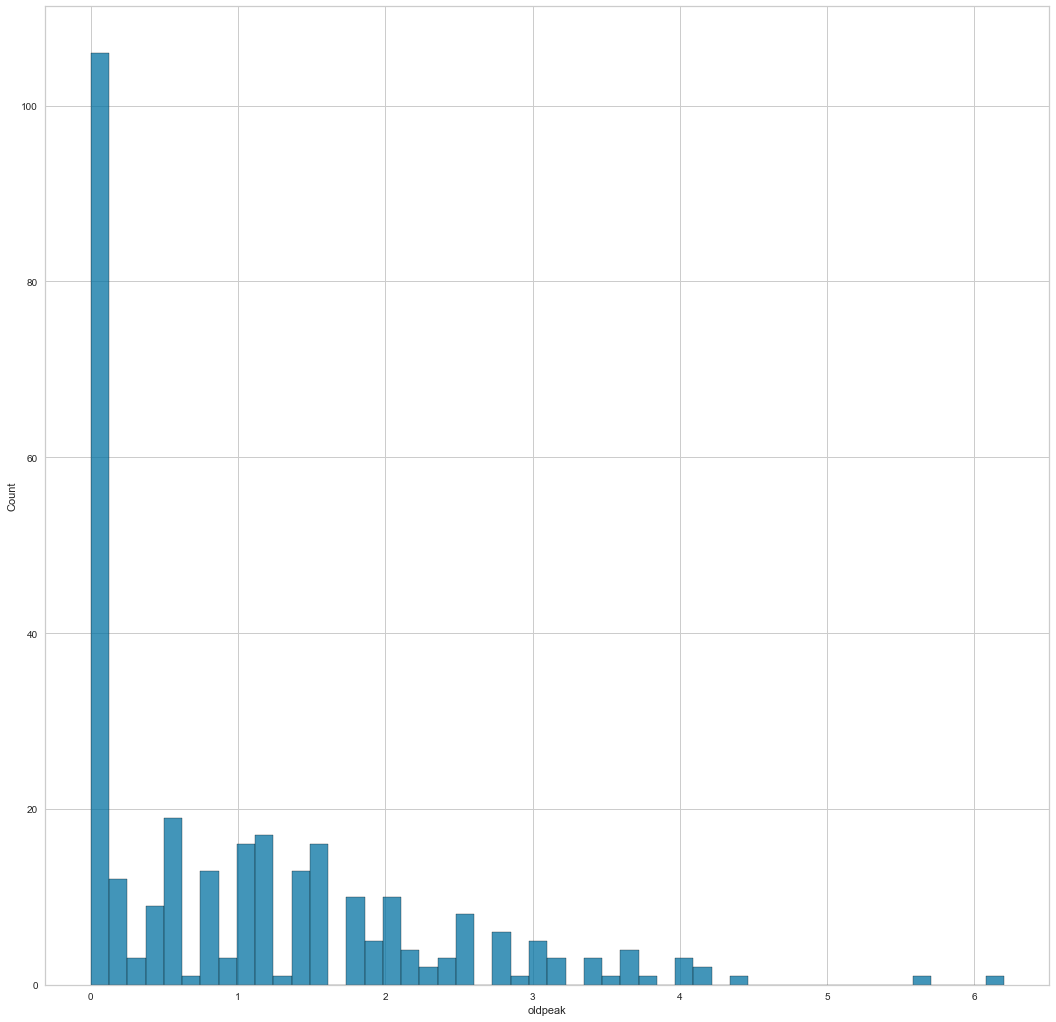

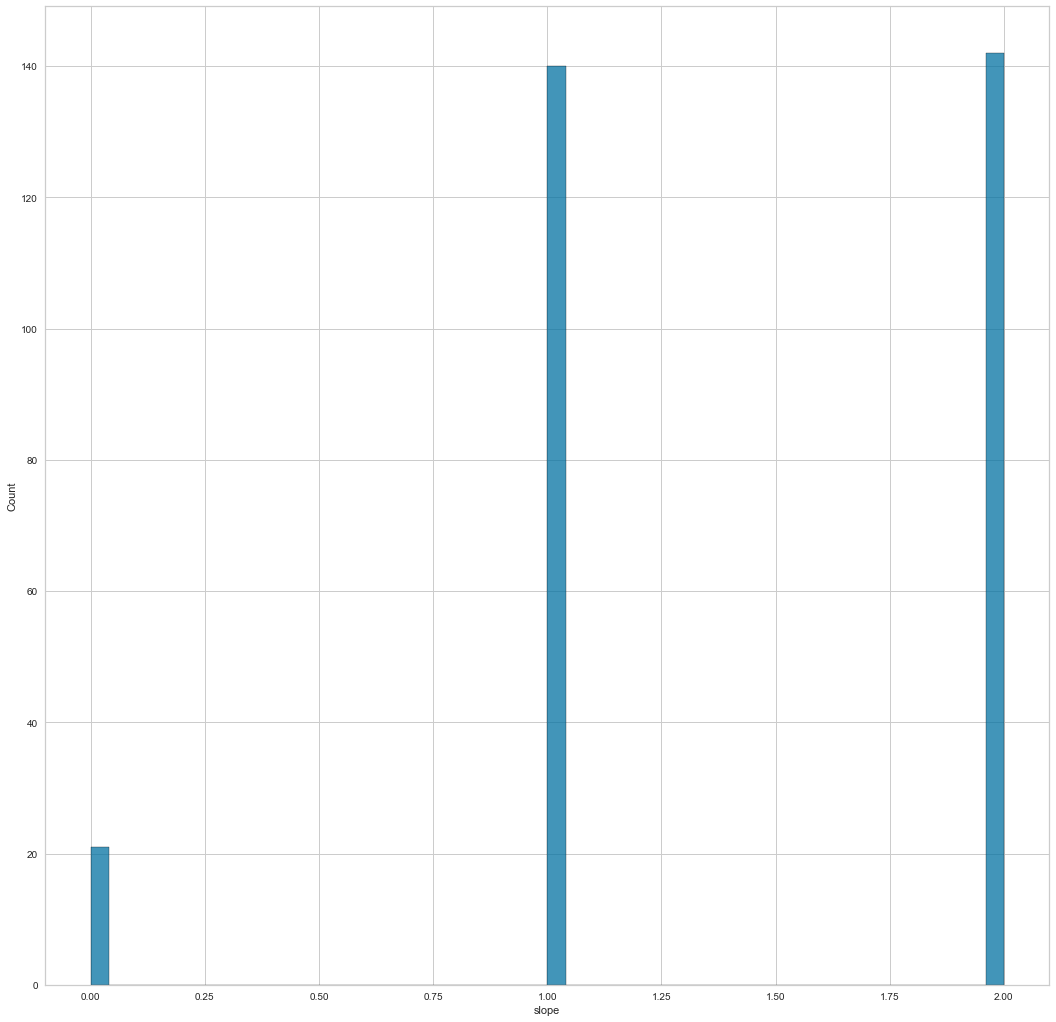

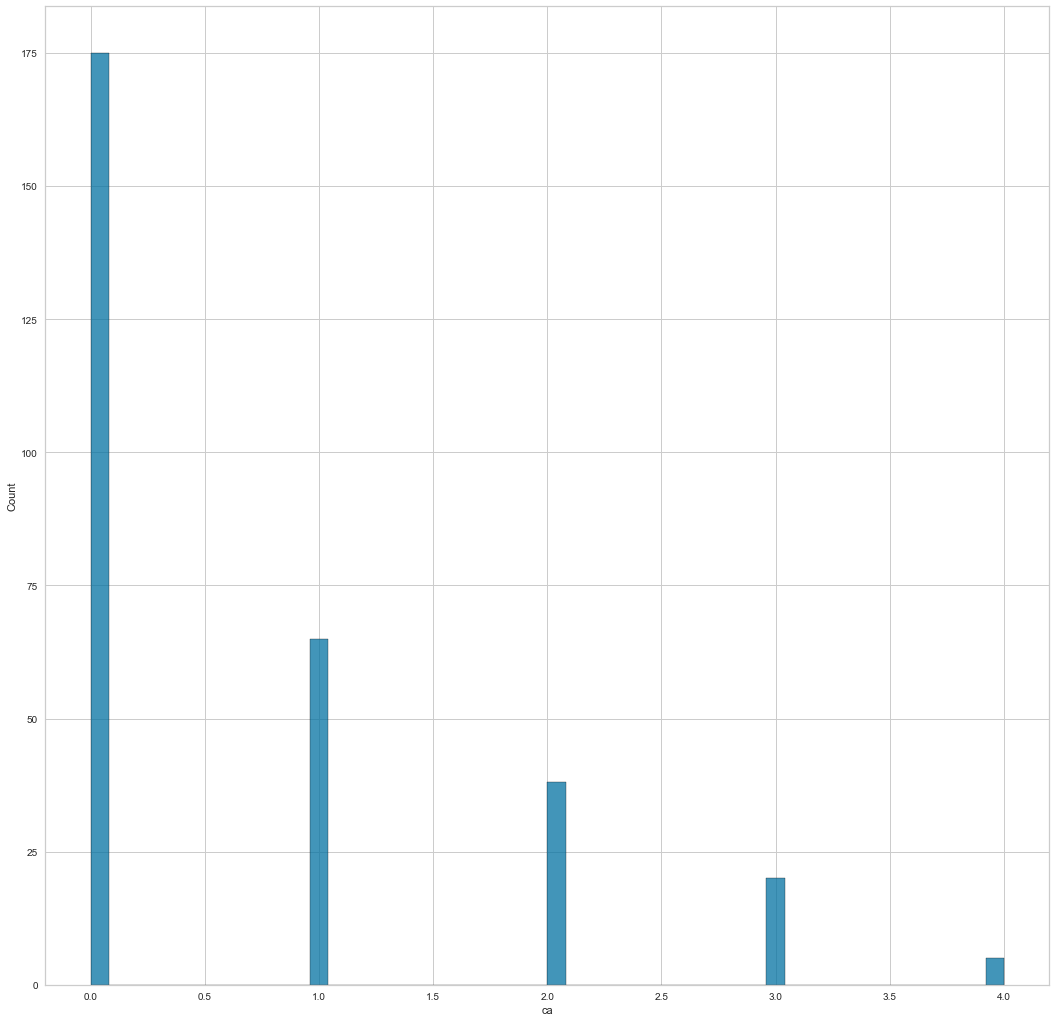

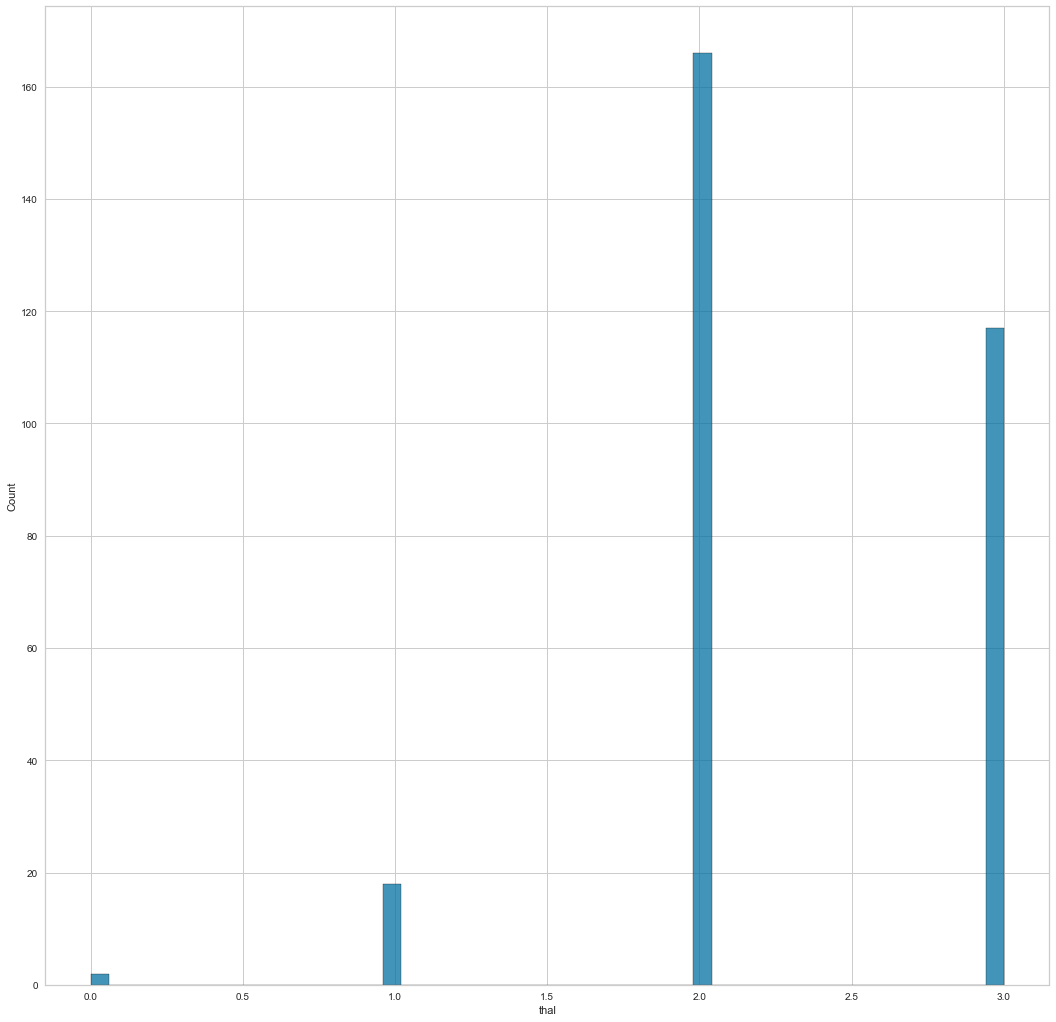

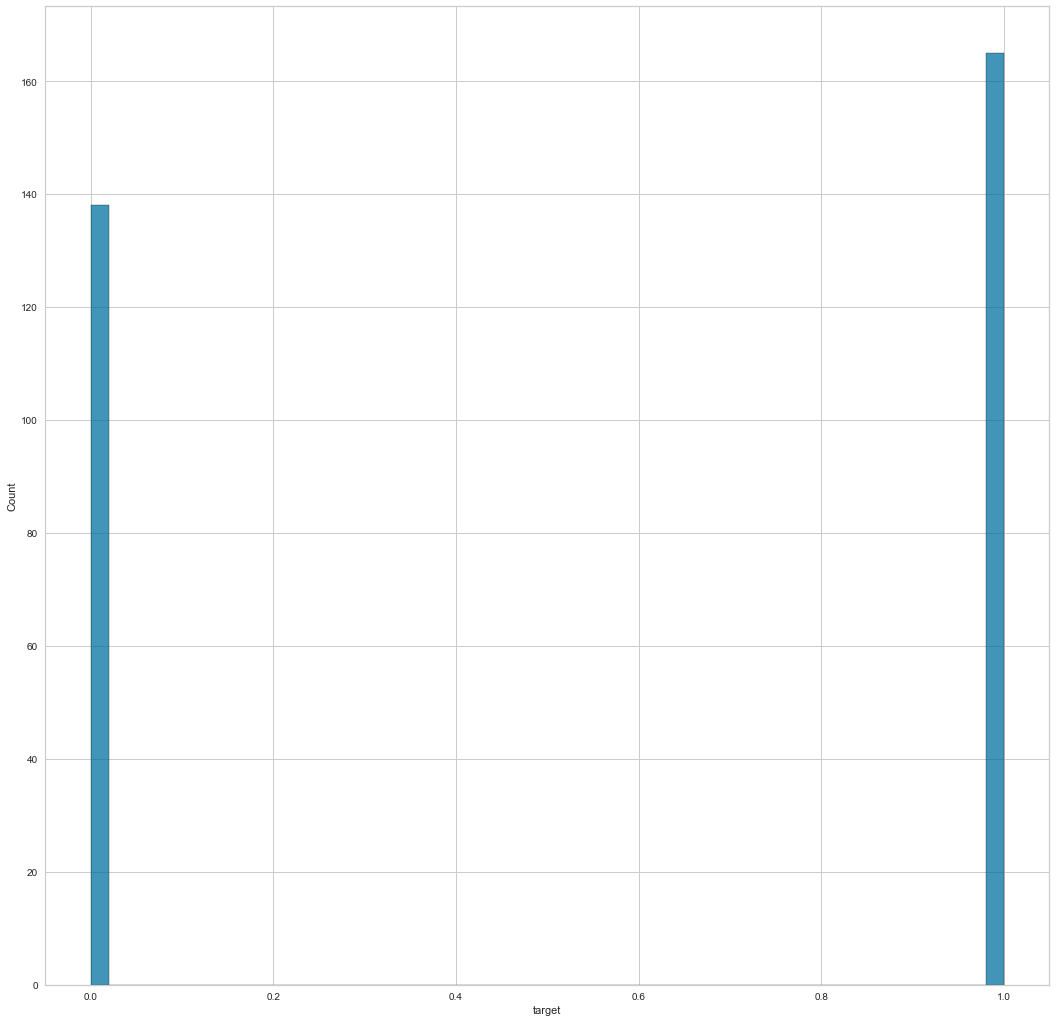

In [12]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col], bins=50)
    

### Exploratory Data Analysis and Visualization

In [13]:
df=pd.get_dummies(df,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)
df

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [14]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,stratify=y, random_state=5)

In [16]:
scaler =MinMaxScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [19]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

### Model Performance

In [21]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [22]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[35  6]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91


Train_Set
[[ 81  16]
 [ 14 101]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        97
           1       0.86      0.88      0.87       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



### Cross Validate!

In [23]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.000000,0.015666,0.750000,0.750000,0.750000,0.727273
2,0.000000,0.000000,0.733333,0.916667,0.814815,0.772727
3,0.015864,0.000506,0.727273,0.727273,0.727273,0.714286
4,0.000000,0.000000,0.909091,0.909091,0.909091,0.904762
5,0.015381,0.000000,0.900000,0.818182,0.857143,0.857143
6,0.000000,0.000000,0.900000,0.818182,0.857143,0.857143
7,0.016411,0.000000,0.818182,0.818182,0.818182,0.809524
8,0.000000,0.000000,0.846154,0.916667,0.880000,0.857143
9,0.000000,0.015852,0.846154,0.916667,0.880000,0.857143
10,0.000000,0.000000,0.846154,0.916667,0.880000,0.857143


In [24]:
df_scores.mean()[2:]     #  accuracy:0.81  

test_precision    0.827634
test_recall       0.850758
test_f1           0.837365
test_accuracy     0.821429
dtype: float64

In [25]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[35  6]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91


Train_Set
[[ 81  16]
 [ 14 101]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        97
           1       0.86      0.88      0.87       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



### GridSearchCV

In [26]:
C = np.logspace(-1, 5, 20)
C

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [27]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [28]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [29]:
grid_model.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

In [30]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[33  8]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91


Train_Set
[[ 82  15]
 [ 13 102]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        97
           1       0.87      0.89      0.88       115

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [31]:
from sklearn.metrics import (plot_roc_curve, 
                             plot_precision_recall_curve, 
                             roc_auc_score, auc, roc_curve, 
                             average_precision_score, 
                             precision_recall_curve)

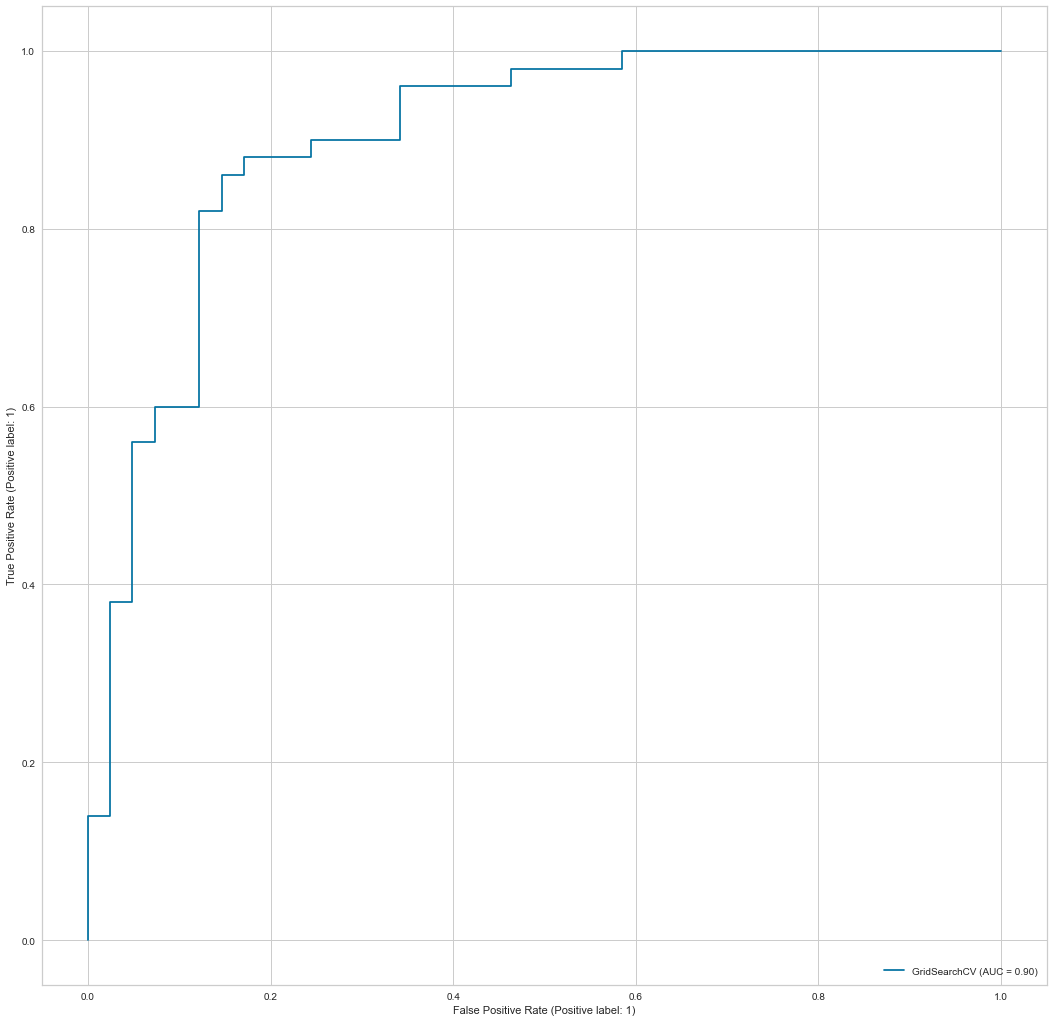

In [32]:
plot_roc_curve(grid_model, X_test_scaled, y_test)

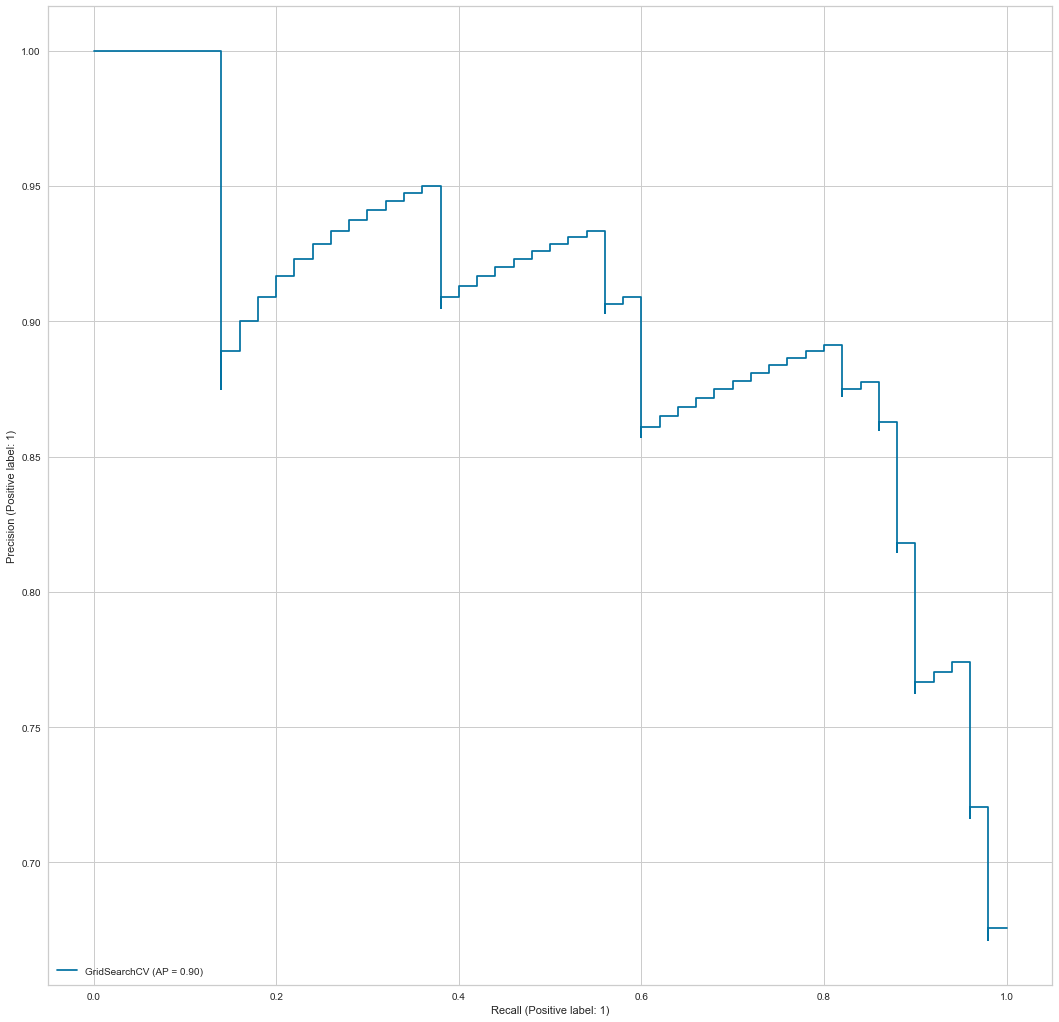

In [33]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test)

### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [35]:
knn_pred = knn.predict(X_test_scaled)
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[34  7]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91


Train_Set
[[ 86  11]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        97
           1       0.90      0.87      0.88       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



### Elbow Method for Choosing Reasonable K Values

In [36]:
from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             recall_score, 
                             precision_score)

In [37]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
    y_pred_test = knn_model.predict(X_test_scaled)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

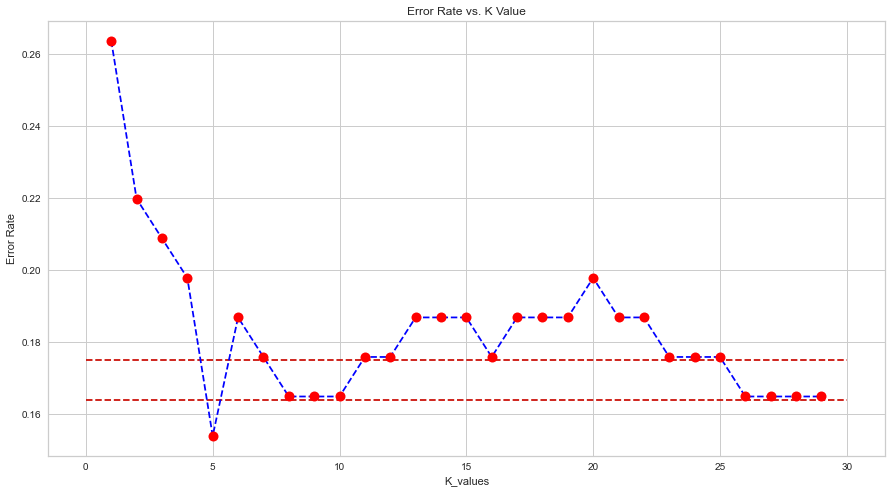

In [38]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.164, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.175, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### Scores by Various K Values

In [39]:
knn = KNeighborsClassifier(n_neighbors=9)  # accuracy:0.82 -------> 16 hatal? tahmin
knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)  

WITH K=9

Test_Set
[[34  7]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91


Train_Set
[[83 14]
 [16 99]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        97
           1       0.88      0.86      0.87       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



In [40]:
knn = KNeighborsClassifier(n_neighbors=22)   # accuracy:0.84 -------> 15 hatal? tahmin
knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Train_Set
[[76 21]
 [17 98]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        97
           1       0.82      0.85      0.84       115

    accuracy                           0.82       212
   macro avg       0.82      0.82      0.82       212
weighted avg       0.82      0.82      0.82       212



### Cross Validate

### Gridsearch Method for Choosing Reasonable K Values

In [41]:
knn_grid = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

In [42]:
knn_grid_model.best_params_

{'n_neighbors': 5}

In [43]:
print('WITH K=18\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=18

Test_Set
[[34  7]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91


Train_Set
[[ 86  11]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        97
           1       0.90      0.87      0.88       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



### Evaluating ROC Curves and AUC

In [44]:
from sklearn.metrics import (precision_recall_curve, 
                             plot_precision_recall_curve, 
                             plot_roc_curve, 
                             roc_auc_score, roc_curve)

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

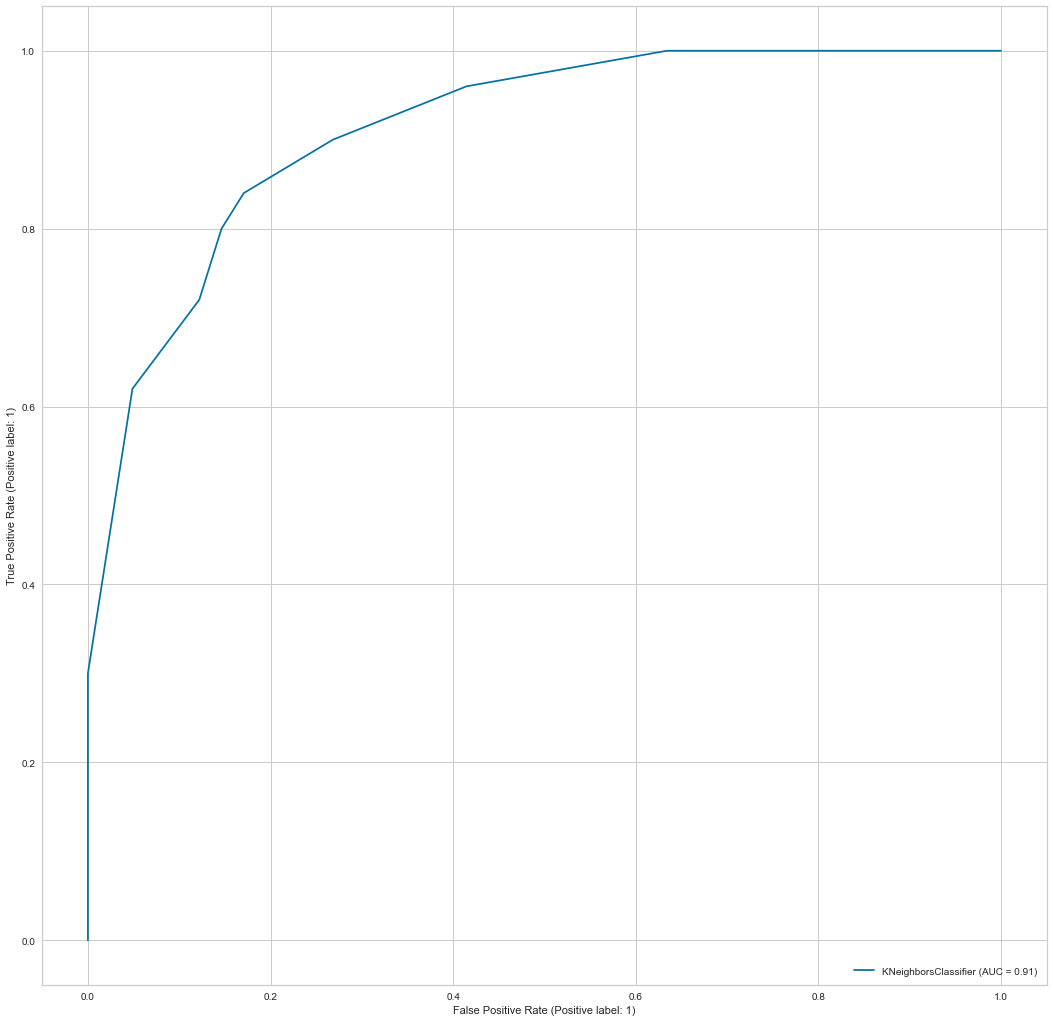

In [46]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [47]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9119512195121952

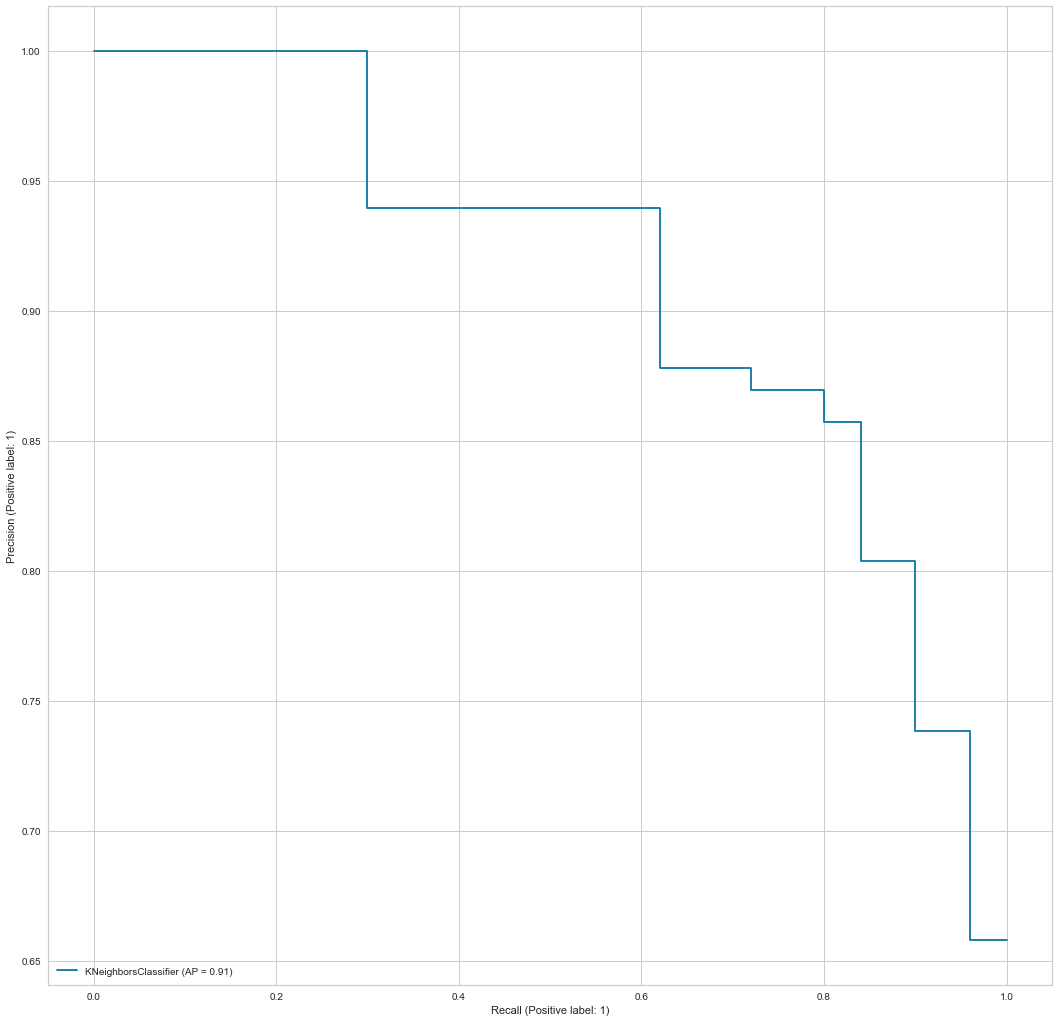

In [48]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test);